In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [66]:
data = pd.read_excel('Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [67]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [68]:
data.Destination.replace(to_replace='New Delhi',value='Delhi',inplace=True)

In [69]:
data.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [70]:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [71]:
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [72]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [73]:
data.dropna(inplace=True)

In [74]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [75]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [76]:
# extracting day and month and dropping 'Journey_day'
data['Journey_day'] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data['Journey_day']

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Journey_day, Length: 10682, dtype: int64

In [77]:
data['Journey_month'] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month
data['Journey_month']

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Journey_month, Length: 10682, dtype: int64

In [78]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [79]:
data.drop(labels='Date_of_Journey',inplace=True,axis=1)

In [80]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [81]:
# extracting hour and minute and dropping 'Dep_Time'
data['Dep_Hour'] = pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_Hour']

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_Hour, Length: 10682, dtype: int64

In [82]:
data['Dep_min'] = pd.to_datetime(data.Dep_Time).dt.minute
data['Dep_min']

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_min, Length: 10682, dtype: int64

In [83]:
data.drop(labels='Dep_Time',inplace=True,axis=1)
data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [84]:
# arrival time is time inbound plane lands on the airport
# extracting hour and minute and dropping Arrival_Time
data['Arrival_hour'] = pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_min'] = pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(labels='Arrival_Time',axis=1,inplace=True)

In [109]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,4h 45m,1,13302,1,3,16,50,21,35,4,45


In [86]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [87]:
# this is how the split works first split based on m-> '2h 3','m' second split based on space->'2h','3'
"2h 3m".split(sep = "m")[0].split()[-1]

'3'

In [88]:
# Adding duration_hours and duration_mins data 
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [89]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

1. *Nominal data* --> data are not in any order --> *OneHotEncoder* is used in this case
2. *Ordinal data* --> data are in order --> *LabelEncoder* is used in this case

In [90]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

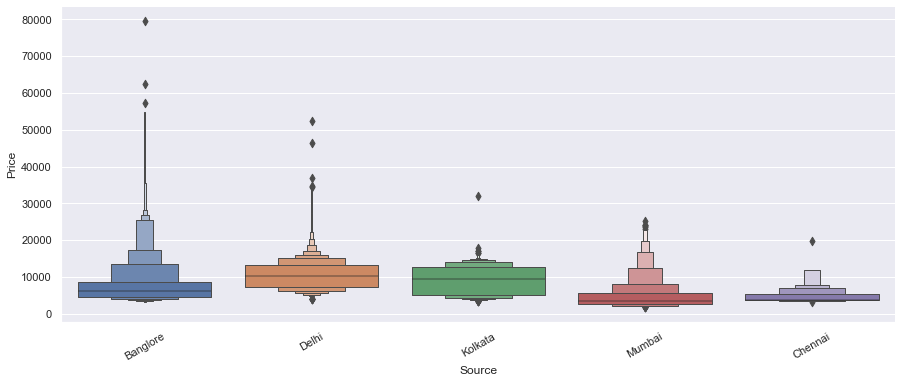

In [91]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
g = sns.catplot(x='Source',y='Price',data=data.sort_values("Price", ascending = False),kind='boxen',aspect=2.5)
g.set_xticklabels(rotation=30)

In [92]:
Source = data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [93]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [94]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [95]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [96]:
# Route and Total_Stops are related to each other
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [97]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [98]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [99]:
new_data = pd.concat([data, Airline, Source, Destination], axis = 1)

In [100]:
new_data.drop(labels={'Airline','Source','Destination','Duration'},axis=1,inplace=True)

In [101]:
new_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


### Test set

In [102]:
test_set = pd.read_excel('Test_set.xlsx')
test_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [103]:
# drop na value from the test set
test_set.dropna(inplace=True)
test_set.Destination.replace(to_replace='New Delhi',value='Delhi',inplace=True)
# extracting day and month and dropping 'Journey_day'
test_set['Journey_day'] = pd.to_datetime(test_set.Date_of_Journey, format="%d/%m/%Y").dt.day
test_set['Journey_month'] = pd.to_datetime(test_set.Date_of_Journey, format="%d/%m/%Y").dt.month
test_set.drop(labels='Date_of_Journey',inplace=True,axis=1)

# extracting hour and minute and dropping 'Dep_Time'
test_set['Dep_Hour'] = pd.to_datetime(test_set.Dep_Time).dt.hour
test_set['Dep_min'] = pd.to_datetime(test_set.Dep_Time).dt.minute
test_set.drop(labels='Dep_Time',inplace=True,axis=1)

# arrival time is time inbound plane lands on the airport
# extracting hour and minute and dropping Arrival_Time
test_set['Arrival_hour'] = pd.to_datetime(test_set.Arrival_Time).dt.hour
test_set['Arrival_min'] = pd.to_datetime(test_set.Arrival_Time).dt.minute
test_set.drop(labels='Arrival_Time',axis=1,inplace=True)

# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(test_set["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
# Adding duration_hours and duration_mins data 
test_set["Duration_hours"] = duration_hours
test_set["Duration_mins"] = duration_mins

# creating the dummies for nominal data
Source = test_set[['Source']]
Source = pd.get_dummies(Source,drop_first=True)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = test_set[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = test_set[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
test_set.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

new_test_set = pd.concat([test_set, Airline, Source, Destination], axis = 1)
new_test_set.drop(labels={'Airline','Source','Destination','Duration','Route','Additional_Info'},axis=1,inplace=True)

In [104]:
new_test_set.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,1,0,0,1,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,0,1,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,1,0,0


### Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. *heatmap*
2. *feature_importance_*
3. *SelectKBest*

In [105]:
'columns', new_test_set.columns,'shape', new_test_set.shape

('columns',
 Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_Hour', 'Dep_min',
        'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
        'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
        'Airline_Jet Airways', 'Airline_Jet Airways Business',
        'Airline_Multiple carriers',
        'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
        'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
        'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
        'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
       dtype='object'),
 'shape',
 (2671, 27))

In [106]:
new_test_set.iloc[:, 1]

0        6
1       12
2       21
3       21
4       24
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Journey_day, Length: 2671, dtype: int64

In [107]:
new_test_set.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,1,0,0,1,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,0,1,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,1,0,0


In [110]:
new_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [111]:
y = new_data.Price

In [112]:
X = new_data
X.drop(labels='Price',axis=1,inplace=True)

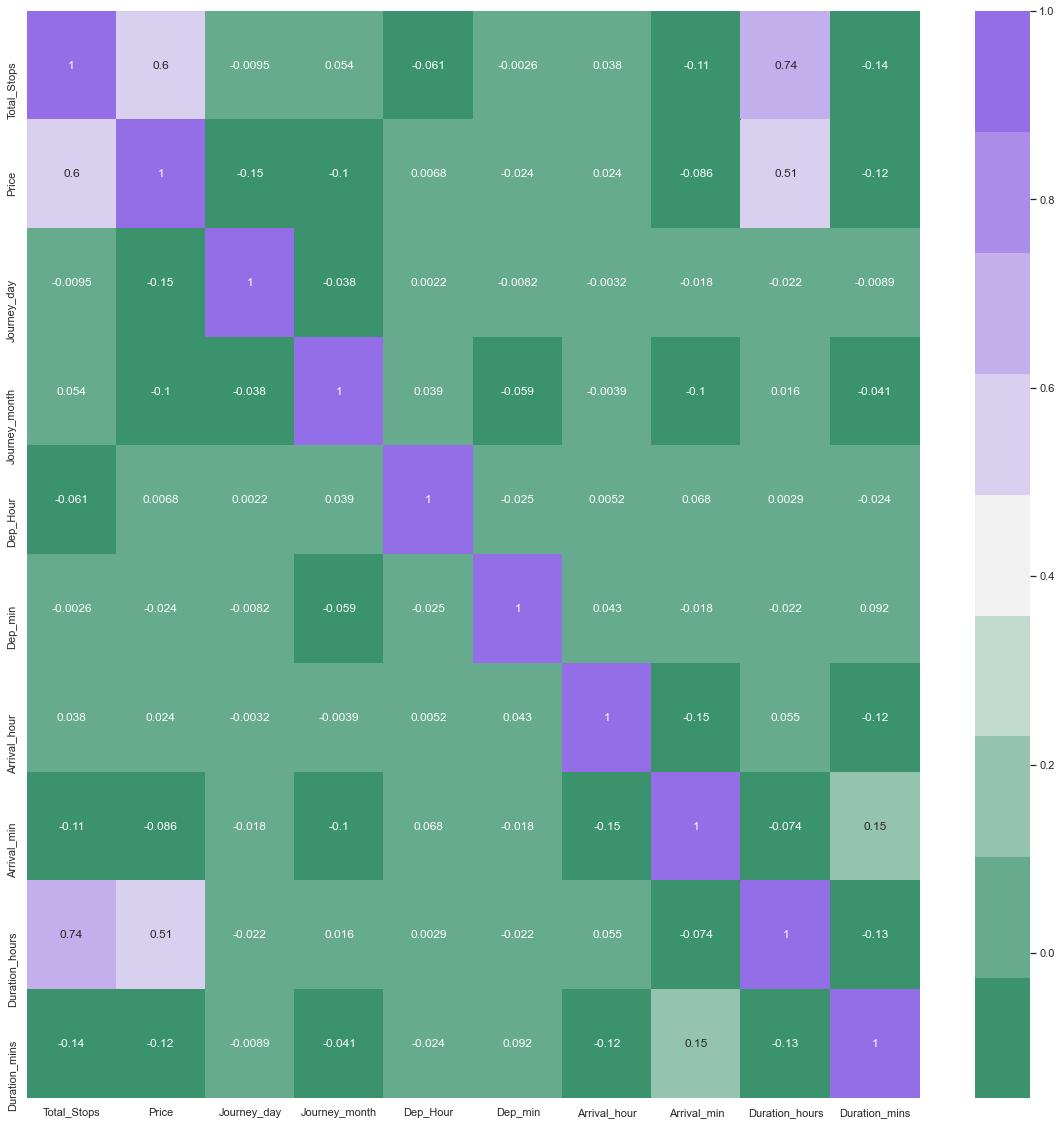

In [122]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (20,20))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
sns.heatmap(data.corr(), annot = True, cmap=cmap)
plt.show()

In [123]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [124]:
print(selection.feature_importances_)

[2.46610551e-01 1.43350219e-01 5.82440664e-02 2.40572827e-02
 2.14029254e-02 2.75054833e-02 1.89738418e-02 1.11156884e-01
 1.83547178e-02 1.03736300e-02 2.15992113e-03 1.95956154e-02
 1.35484282e-01 6.78569586e-02 1.89013673e-02 7.96864371e-04
 5.83390198e-03 1.22609474e-04 4.63668757e-03 6.90321632e-05
 6.43219257e-04 1.20576596e-02 4.77189860e-03 8.70375941e-03
 9.80456840e-03 2.02058608e-02 7.47549437e-03 8.50698102e-04]


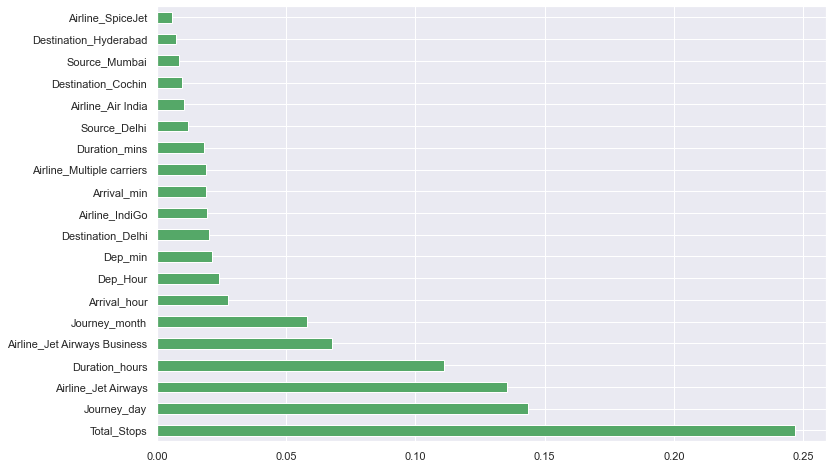

In [130]:
# plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color="g")
plt.show()

### Fitting model using Random Forest
1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [137]:
y_pred = reg_rf.predict(X_test)

In [138]:
rf.score(X_train, y_train)

0.952170175723205

In [139]:
rf.score(X_test, y_test)

0.8383340931339615

C:\Users\AMD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


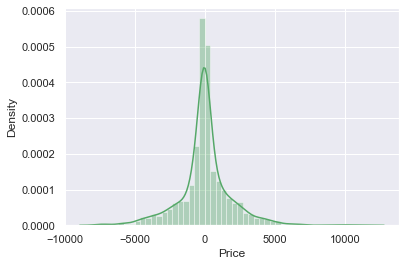

In [159]:
sns.distplot(y_test-y_pred,color='g')
plt.show()

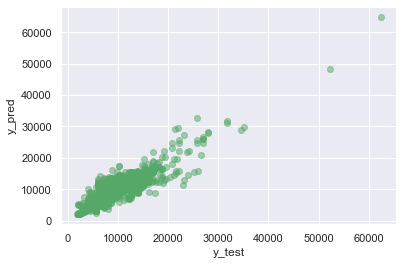

In [160]:
plt.scatter(y_test, y_pred, alpha = 0.5,color='g')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [144]:
from sklearn import metrics

In [145]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1177.5846330406712
MSE: 3506043.50495789
RMSE: 1872.4431913833569


In [146]:
# RMSE/(max(DV)-min(DV))
2090.5509/(max(y)-min(y))

0.026887077025966846

In [147]:
metrics.r2_score(y_test, y_pred)

0.8418625018084289

### Hyperparameter Tuning
* Choose following method for hyperparameter tuning
    1. RandomizedSearchCV --> Fast
    2. GridSearchCV
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [151]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [152]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [153]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [154]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [155]:
prediction = rf_random.predict(X_test)

C:\Users\AMD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


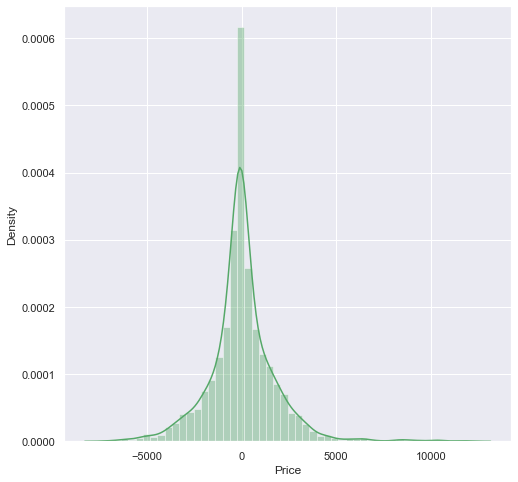

In [161]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction,color='g')
plt.show()

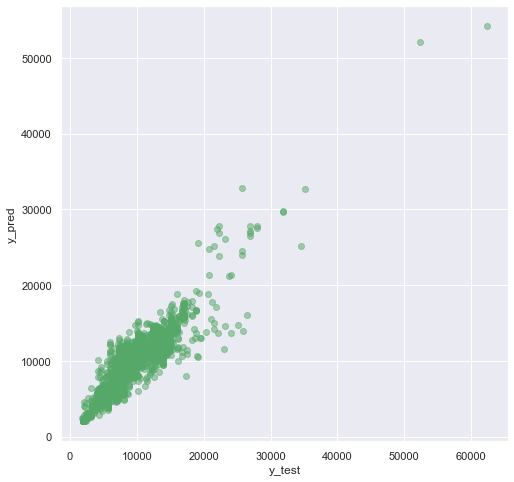

In [162]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5,color='g')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [158]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1162.2893903303468
MSE: 3207138.6824752335
RMSE: 1790.8485928395046


### Save the model to reuse it again

In [163]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [165]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [166]:
y_prediction = forest.predict(X_test)

In [167]:
metrics.r2_score(y_test, y_prediction)

0.8418625018084289

In [168]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
